In [ ]:
import random
import matplotlib.pyplot as plt
import time

In [ ]:
def generate_random_rods(n):
    lengths = []
    prices = []
    for _ in range(n):
        length = random.randint(1, 10)
        price = random.randint(1, 100)
        lengths.append(length)
        prices.append(price)
    return lengths, prices

Rod Lengths: [7, 7, 8, 7, 9, 9, 5, 7, 5, 8]
Prices: [100, 10, 76, 35, 46, 75, 77, 36, 52, 71]
Maximum Obtainable Price (Dynamic Programming): 200
Maximum Obtainable Price (Brute Force): 1000


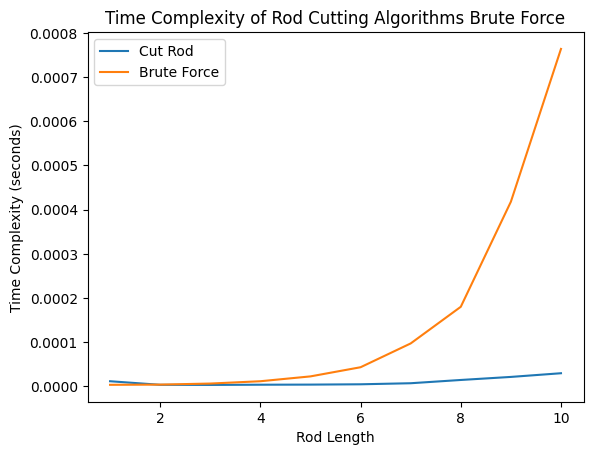

In [ ]:
def cut_rod(lengths, prices, n):
    if n <= 0:
        return 0
    
    max_price = float('-inf')
    for i in range(n):
        max_price = max(max_price, prices[i] + cut_rod(lengths, prices, n - lengths[i]))
    
    return max_price


def brute_force_cut_rod(lengths, prices, n):
    if n <= 0:
        return 0
    
    max_price = 0
    for i in range(1, n + 1):
        max_price = max(max_price, prices[i - 1] + brute_force_cut_rod(lengths, prices, n - i))
    
    return max_price


def plot_time_complexity(lengths, prices):
    n_values = []
    time_values_cut_rod = []
    time_values_brute_force = []

    for n in range(1, len(lengths) + 1):
        start_time = time.time()
        cut_rod(lengths, prices, n)
        end_time = time.time()
        elapsed_time_cut_rod = end_time - start_time

        start_time = time.time()
        brute_force_cut_rod(lengths, prices, n)
        end_time = time.time()
        elapsed_time_brute_force = end_time - start_time

        n_values.append(n)
        time_values_cut_rod.append(elapsed_time_cut_rod)
        time_values_brute_force.append(elapsed_time_brute_force)

    plt.plot(n_values, time_values_cut_rod, label='Cut Rod')
    plt.plot(n_values, time_values_brute_force, label='Brute Force')
    plt.xlabel('Rod Length')
    plt.ylabel('Time Complexity (seconds)')
    plt.title('Time Complexity of Rod Cutting Algorithms Brute Force')
    plt.legend()
    plt.show()


# Generate random rod lengths and prices
lengths, prices = generate_random_rods(10)

# Print the generated rod lengths and prices
print("Rod Lengths:", lengths)
print("Prices:", prices)

# Calculate and print the maximum obtainable price using dynamic programming
max_price = cut_rod(lengths, prices, len(lengths))
print("Maximum Obtainable Price (Dynamic Programming):", max_price)

# Calculate and print the maximum obtainable price using brute force
max_price_brute_force = brute_force_cut_rod(lengths, prices, len(lengths))
print("Maximum Obtainable Price (Brute Force):", max_price_brute_force)

# Plot the time complexity graph
plot_time_complexity(lengths, prices)